In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import combined_threshold as com_thresh

dist_pickle = pickle.load( open( "output_images/calibrate_camera.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
if len(mtx) > 0 and len(dist) > 0:
    print("Loaded mtx and dist!")
else:
    print("Error, something went wrong, mtx and dist have not been loaded properly")

Loaded mtx and dist!


In [2]:
def perspective_transform(img):
    """
    Execute perspective transform
    """
    img_size = (img.shape[1], img.shape[0])

    imshape = img.shape
    vertices1 = np.array([[(.55*imshape[1], 0.63*imshape[0]), (imshape[1],imshape[0]),
                       (0,imshape[0]),(.45*imshape[1], 0.63*imshape[0])]], dtype=np.float32)
    src= np.float32(vertices1)
    vertices2 = np.array([[0.75*img.shape[1],0],[0.75*img.shape[1],img.shape[0]],
                      [0.25*img.shape[1],img.shape[0]],[0.25*img.shape[1],0]])
    dst = np.float32(vertices2)

    m = cv2.getPerspectiveTransform(src, dst)
    m_inv = cv2.getPerspectiveTransform(dst, src)

    warped = cv2.warpPerspective(img, m, img_size, flags=cv2.INTER_LINEAR)
    unwarped = cv2.warpPerspective(warped, m_inv, (warped.shape[1], warped.shape[0]), flags=cv2.INTER_LINEAR)  # DEBUG

    return warped, unwarped, m, m_inv

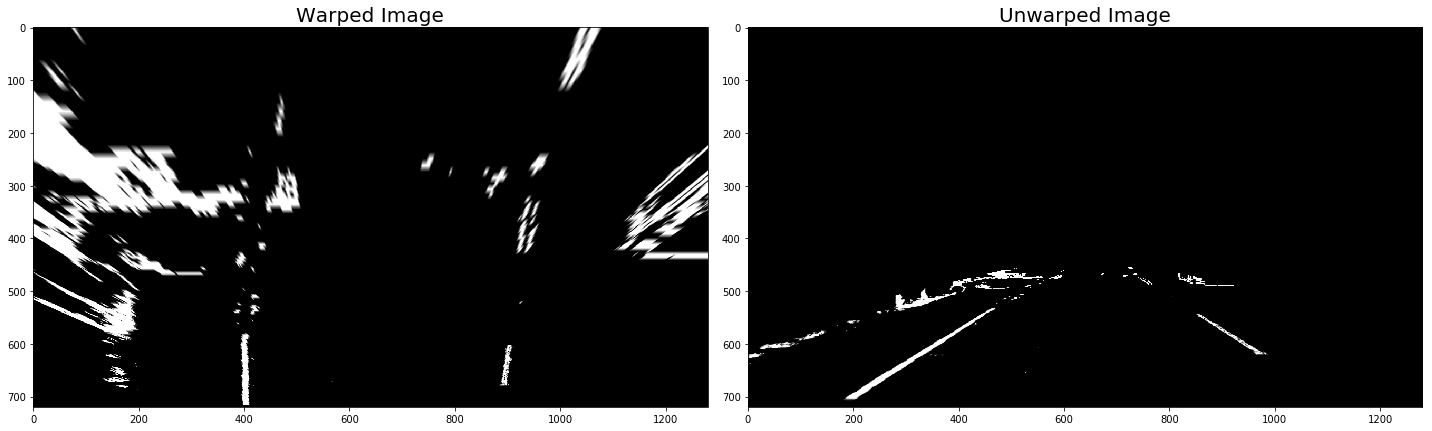

In [8]:
if __name__ == '__main__':
    img_file = 'test_images/test5.jpg'

    with open('output_images/calibrate_camera.p', 'rb') as f:
        save_dict = pickle.load(f)
    mtx = save_dict['mtx']
    dist = save_dict['dist']

    img = mpimg.imread(img_file)
    img = cv2.undistort(img, mtx, dist, None, mtx)

    img, abs_bin, mag_bin, dir_bin, hls_bin = com_thresh.combined_thresh(img)

    warped, unwarped, m, m_inv = perspective_transform(img)

    plt.subplots(1, 2, figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.imshow(warped, cmap='gray', vmin=0, vmax=1)
    plt.title("Warped Image", fontsize=20)
    plt.subplot(1, 2, 2)
    plt.imshow(unwarped, cmap='gray', vmin=0, vmax=1)
    plt.title("Unwarped Image", fontsize=20)
    
    plt.tight_layout()
    plt.savefig('output_images/undistort_transform.jpg')
    plt.show()